In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [113]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [114]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [115]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [116]:
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Check for duplicates
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
0
0
0


In [117]:
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])

In [118]:
print(customers.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6 

In [119]:
# Merge transactions with customers
merged_data = pd.merge(transactions, customers, on='CustomerID')

# Merge the result with products
merged_data = pd.merge(merged_data, products, on='ProductID')

In [120]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [121]:
##customer analysis

In [122]:
# Total number of customers
total_customers = customers['CustomerID'].nunique()
print(f"Total Customers: {total_customers}")

Total Customers: 200


In [123]:
# Customer distribution by region
region_distribution = customers['Region'].value_counts()
print(region_distribution)

South America    59
Europe           50
North America    46
Asia             45
Name: Region, dtype: int64


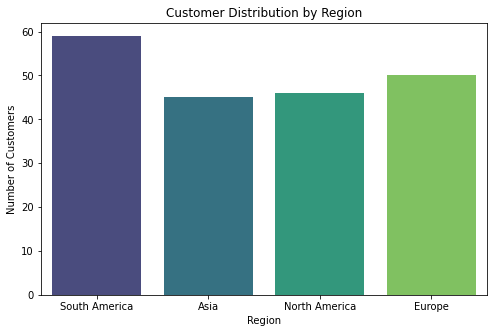

In [124]:
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

In [125]:
# Customer signup trends over time
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYearMonth'] = customers['SignupDate'].dt.to_period('M')

In [126]:
signup_trends = customers.groupby('SignupYearMonth').size().reset_index(name='Count')
signup_trends['SignupYearMonth'] = signup_trends['SignupYearMonth'].astype(str)


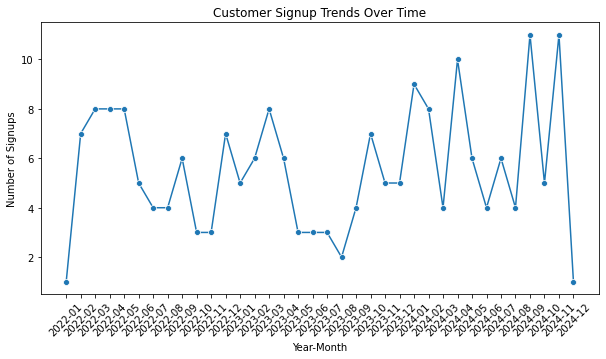

In [127]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=signup_trends, x='SignupYearMonth', y='Count', marker='o')
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.show()

In [128]:
##product analysis

In [129]:
# Total number of products
total_products = products['ProductID'].nunique()
print(f"Total Products: {total_products}")

Total Products: 100


In [130]:
# Product distribution by category
category_distribution = products['Category'].value_counts()
print(category_distribution)

Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: Category, dtype: int64


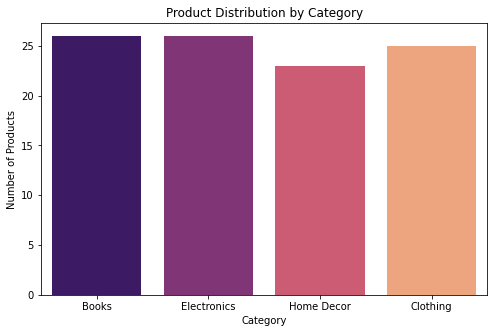

In [131]:
# Plot product distribution by category
plt.figure(figsize=(8, 5))
sns.countplot(data=products, x='Category', palette='magma')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

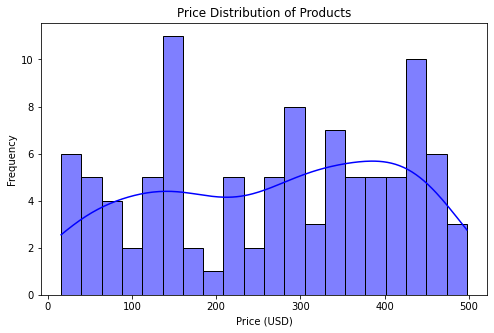

In [132]:
# Price distribution
plt.figure(figsize=(8, 5))
sns.histplot(products['Price'], bins=20, kde=True, color='blue')
plt.title('Price Distribution of Products')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

In [133]:
##transaction analysis

In [134]:
# Total revenue
total_revenue = merged_data['TotalValue'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

Total Revenue: $689,995.56


In [135]:
# Revenue by region
revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum().reset_index()
print(revenue_by_region)

          Region  TotalValue
0           Asia   152074.97
1         Europe   166254.63
2  North America   152313.40
3  South America   219352.56


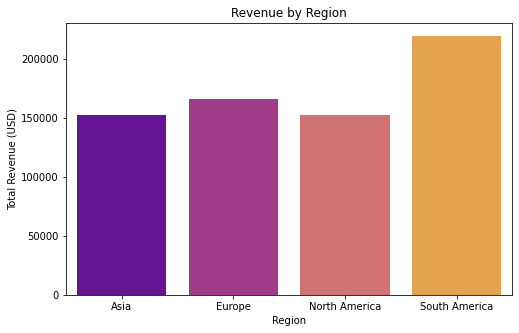

In [136]:
# Plot revenue by region
plt.figure(figsize=(8, 5))
sns.barplot(data=revenue_by_region, x='Region', y='TotalValue', palette='plasma')
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue (USD)')
plt.show()

In [137]:
#Revenue by product category
revenue_by_category = merged_data.groupby('Category')['TotalValue'].sum().reset_index()
print(revenue_by_category)

      Category  TotalValue
0        Books   192147.47
1     Clothing   166170.66
2  Electronics   180783.50
3   Home Decor   150893.93


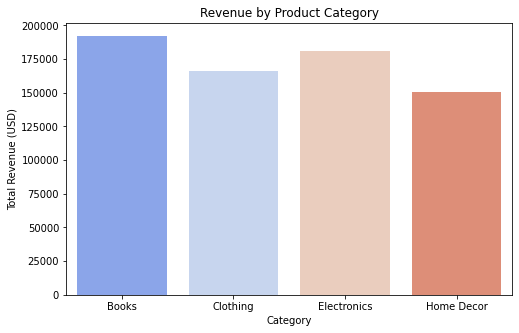

In [138]:
# Plot revenue by category
plt.figure(figsize=(8, 5))
sns.barplot(data=revenue_by_category, x='Category', y='TotalValue', palette='coolwarm')
plt.title('Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue (USD)')
plt.show()

In [139]:
# Top 10 customers by total spending
top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().nlargest(10).reset_index()
print(top_customers)

           CustomerName  TotalValue
0          Paul Parsons    10673.87
1          Bruce Rhodes     8040.39
2          Gerald Hines     7663.70
3         William Adams     7634.45
4          Aimee Taylor     7572.91
5             Anna Ball     7111.32
6  Mrs. Kimberly Wright     7073.28
7         Jennifer Pena     6819.57
8          Rodney Eaton     6715.72
9         Juan Mcdaniel     6708.10


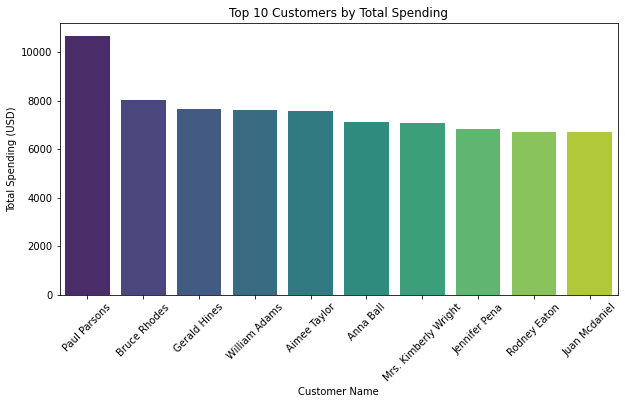

In [140]:
# Plot top 10 customers
plt.figure(figsize=(10, 5))
sns.barplot(data=top_customers, x='CustomerName', y='TotalValue', palette='viridis')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Customer Name')
plt.ylabel('Total Spending (USD)')
plt.xticks(rotation=45)
plt.show()

In [141]:
# Top 10 products by sales quantity
top_products = merged_data.groupby('ProductName')['Quantity'].sum().nlargest(10).reset_index()
print(top_products)

             ProductName  Quantity
0  ActiveWear Smartwatch       100
1   SoundWave Headphones        97
2    HomeSense Desk Lamp        81
3         ActiveWear Rug        79
4     SoundWave Cookbook        78
5      ActiveWear Jacket        76
6    BookWorld Biography        71
7        TechPro T-Shirt        66
8    SoundWave Desk Lamp        64
9       TechPro Textbook        62


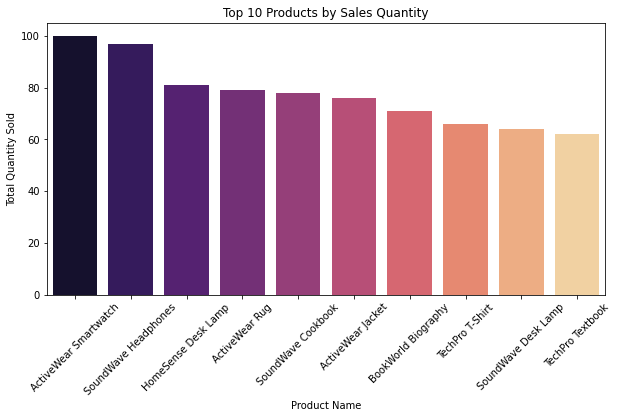

In [142]:
# Plot top 10 products
plt.figure(figsize=(10, 5))
sns.barplot(data=top_products, x='ProductName', y='Quantity', palette='magma')
plt.title('Top 10 Products by Sales Quantity')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

In [143]:
# Convert TransactionDate to datetime
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['TransactionYearMonth'] = merged_data['TransactionDate'].dt.to_period('M')

In [144]:
# Aggregate monthly revenue
monthly_revenue = merged_data.groupby('TransactionYearMonth')['TotalValue'].sum().reset_index()
monthly_revenue['TransactionYearMonth'] = monthly_revenue['TransactionYearMonth'].astype(str)

In [145]:
print(monthly_revenue[['TransactionYearMonth','TotalValue']])

   TransactionYearMonth  TotalValue
0               2023-12     3769.52
1               2024-01    66376.39
2               2024-02    51459.27
3               2024-03    47828.73
4               2024-04    57519.06
5               2024-05    64527.74
6               2024-06    48771.18
7               2024-07    71366.39
8               2024-08    63436.74
9               2024-09    70603.75
10              2024-10    47063.22
11              2024-11    38224.37
12              2024-12    59049.20


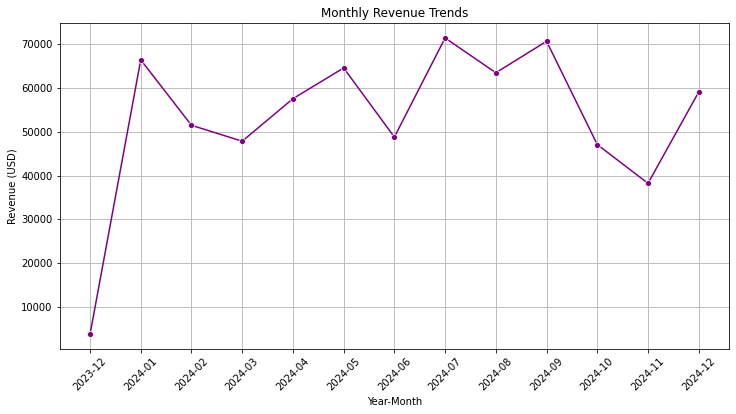

In [146]:
# Plot monthly revenue
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='TransactionYearMonth', y='TotalValue', marker='o', color='purple')
plt.title('Monthly Revenue Trends')
plt.xlabel('Year-Month')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [147]:
# Calculate CLV
clv = merged_data.groupby('CustomerID')['TotalValue'].sum().reset_index()
clv = clv.merge(customers[['CustomerID', 'SignupDate', 'Region']], on='CustomerID')

In [148]:
# Segment CLV into quantiles
clv['CLV Segment'] = pd.qcut(clv['TotalValue'], q=3, labels=['Low', 'Medium', 'High'])

In [149]:
clv1 = clv.groupby("CLV Segment")["TotalValue"].sum().reset_index()
print(clv1)

  CLV Segment  TotalValue
0         Low   106292.84
1      Medium   215543.92
2        High   368158.80


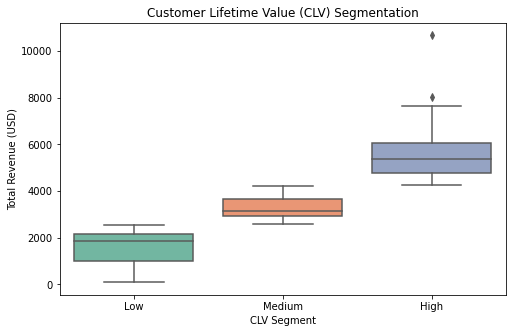

In [150]:
# Plot CLV distribution
plt.figure(figsize=(8, 5))
sns.boxplot(data=clv, x='CLV Segment', y='TotalValue', palette='Set2')
plt.title('Customer Lifetime Value (CLV) Segmentation')
plt.xlabel('CLV Segment')
plt.ylabel('Total Revenue (USD)')
plt.show()

In [151]:
from datetime import datetime

In [152]:
#calculate RFM
snapshot_date = merged_data['TransactionDate'].max() + pd.DateOffset(days=1)
rfm = merged_data.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'TransactionID': 'count',                                     # Frequency
    'TotalValue': 'sum'                                           # Monetary
}).reset_index()
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [153]:
# Assign RFM scores (1=worst, 4=best)
rfm['RecencyScore'] = pd.qcut(rfm['Recency'], q=4, labels=[4, 3, 2, 1])
rfm['FrequencyScore'] = pd.qcut(rfm['Frequency'], q=4, labels=[1, 2, 3, 4])
rfm['MonetaryScore'] = pd.qcut(rfm['Monetary'], q=4, labels=[1, 2, 3, 4])

In [154]:
# Combine scores
rfm['RFM Score'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str) + rfm['MonetaryScore'].astype(str)

In [155]:
# Segment customers
rfm['Segment'] = 'Low Value'
rfm.loc[rfm['RFM Score'].isin(['444', '443', '434']), 'Segment'] = 'High Value'
rfm.loc[rfm['RFM Score'].isin(['344', '334', '333']), 'Segment'] = 'Medium Value'

In [156]:
# Merge with customer data
rfm = rfm.merge(customers[['CustomerID', 'Region', 'SignupDate']], on='CustomerID')

In [157]:
rfm1 = rfm[['Region','Segment']].value_counts()
print(rfm1)

Region         Segment     
South America  Low Value       46
Europe         Low Value       43
North America  Low Value       39
Asia           Low Value       36
South America  Medium Value     8
North America  High Value       6
South America  High Value       5
Asia           High Value       4
               Medium Value     4
Europe         Medium Value     4
               High Value       3
North America  Medium Value     1
dtype: int64


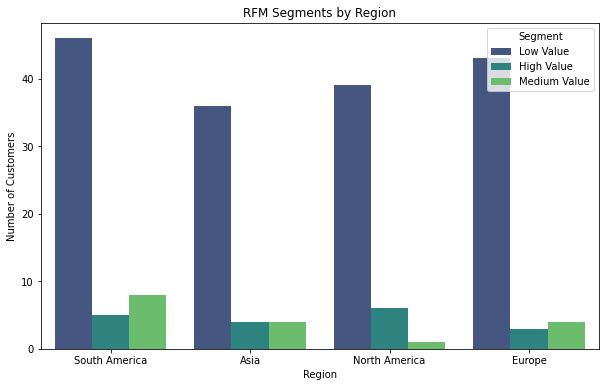

In [158]:
# Plot RFM segments by region
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm, x='Region', hue='Segment', palette='viridis')
plt.title('RFM Segments by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

In [159]:
# Calculate cumulative revenue contribution
product_revenue = merged_data.groupby('ProductID')['TotalValue'].sum().reset_index()
product_revenue = product_revenue.sort_values('TotalValue', ascending=False)
product_revenue['Cumulative %'] = (product_revenue['TotalValue'].cumsum() / product_revenue['TotalValue'].sum()) * 100

In [160]:
# Assign ABC classes
product_revenue['ABC Class'] = 'C'
product_revenue.loc[product_revenue['Cumulative %'] <= 80, 'ABC Class'] = 'B'
product_revenue.loc[product_revenue['Cumulative %'] <= 50, 'ABC Class'] = 'A'


In [161]:
# Merge with product details
product_revenue = product_revenue.merge(products, on='ProductID')

In [162]:
product_revenue['ABC Class'].value_counts()

C    47
A    27
B    26
Name: ABC Class, dtype: int64

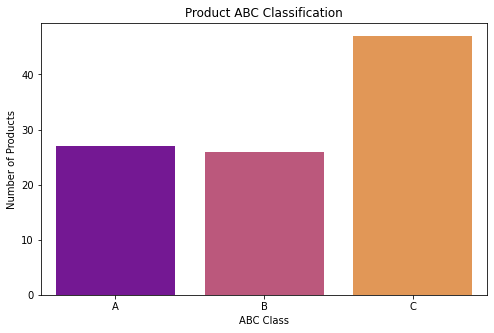

In [163]:
# Plot ABC distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=product_revenue, x='ABC Class', palette='plasma')
plt.title('Product ABC Classification')
plt.xlabel('ABC Class')
plt.ylabel('Number of Products')
plt.show()

In [164]:
# Group by ProductID and analyze price vs. quantity
price_quantity = merged_data.groupby('ProductID').agg({'Price_x': 'mean', 'Quantity': 'sum'}).reset_index()
price_quantity = price_quantity.merge(products[['ProductID', 'Category']], on='ProductID')

In [165]:
price_q = price_quantity.groupby('Category')['Price_x'].nlargest(10)
print(price_q)

Category       
Books        74    497.76
             31    488.63
             16    469.77
             67    447.23
             85    440.70
             17    436.89
             6     420.15
             47    416.40
             84    416.35
             42    404.40
Clothing     44    481.78
             63    452.42
             4     429.31
             75    429.29
             64    427.61
             19    396.34
             91    389.20
             18    385.37
             35    372.55
             45    366.07
Electronics  36    459.86
             40    456.28
             82    455.72
             49    437.65
             28    433.64
             38    430.59
             71    399.34
             41    379.44
             9     350.13
             1     346.30
Home Decor   22    454.53
             93    447.34
             78    417.37
             83    337.91
             20    335.84
             8     325.01
             92    304.94
             73    295

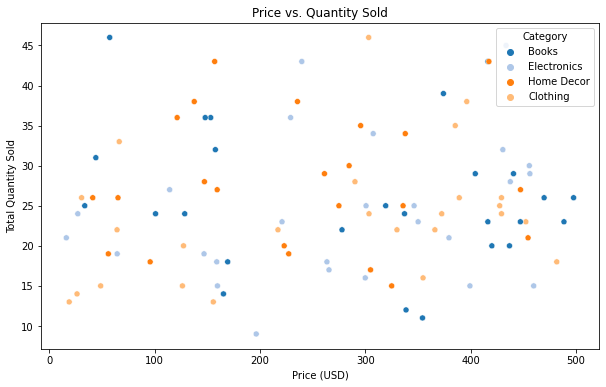

In [166]:
# Plot price vs. quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=price_quantity, x='Price_x', y='Quantity', hue='Category', palette='tab20')
plt.title('Price vs. Quantity Sold')
plt.xlabel('Price (USD)')
plt.ylabel('Total Quantity Sold')
plt.show()

In [167]:
# Calculate average CLV by region
regional_clv = clv.groupby('Region')['TotalValue'].mean().reset_index()

In [168]:
regional_clv[['Region','TotalValue']]

,Region,TotalValue
0,Asia,3456.249318
1,Europe,3325.092600
2,North America,3311.160870
3,South America,3717.840000


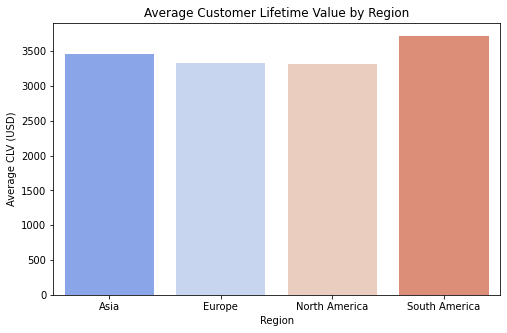

In [169]:
# Plot regional CLV
plt.figure(figsize=(8, 5))
sns.barplot(data=regional_clv, x='Region', y='TotalValue', palette='coolwarm')
plt.title('Average Customer Lifetime Value by Region')
plt.xlabel('Region')
plt.ylabel('Average CLV (USD)')
plt.show()

In [170]:
# Regional product category sales
regional_category = merged_data.groupby(['Region', 'Category'])['TotalValue'].sum().reset_index()

In [171]:
regional_category

,Region,Category,TotalValue
0,Asia,Books,33119.03
1,Asia,Clothing,49353.09
2,Asia,Electronics,35658.15
3,Asia,Home Decor,33944.70
4,Europe,Books,47464.42
5,Europe,Clothing,36335.59
6,Europe,Electronics,41562.60
7,Europe,Home Decor,40892.02
8,North America,Books,41811.99
9,North America,Clothing,38038.49


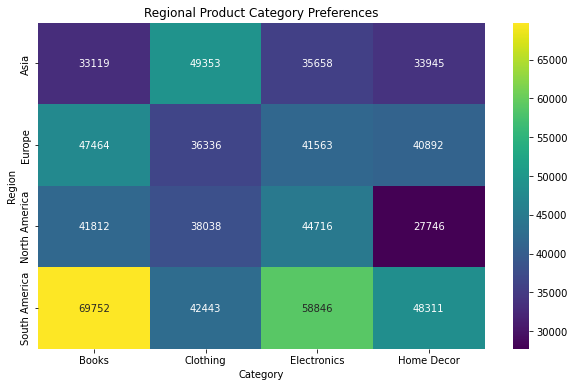

In [172]:
# Heatmap of regional preferences
pivot_table = regional_category.pivot(index='Region', columns='Category', values='TotalValue')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='viridis')
plt.title('Regional Product Category Preferences')
plt.xlabel('Category')
plt.ylabel('Region')
plt.show()

In [174]:
# Define churn as no purchase in the last 90 days
snapshot_date = merged_data['TransactionDate'].max()
churn_cutoff = snapshot_date - pd.DateOffset(days=30)

In [173]:
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y,TransactionYearMonth
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-08
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-05
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-03
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00630,C0031,P093,2024-10-08 23:58:14,2,609.88,304.94,Tina Miller,South America,2024-04-11,TechPro Vase,Home Decor,304.94,2024-10
996,T00672,C0165,P044,2024-07-28 00:09:49,4,75.28,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82,2024-07
997,T00711,C0165,P044,2024-06-11 15:51:14,4,75.28,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82,2024-06
998,T00878,C0165,P044,2024-09-24 21:15:21,3,56.46,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82,2024-09


In [110]:
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y,TransactionYearMonth,Churned,CohortMonth
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-08,1,2022-12
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-05,1,2024-09
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-04,1,2024-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-03,1,2024-04
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-03,1,2022-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00630,C0031,P093,2024-10-08 23:58:14,2,609.88,304.94,Tina Miller,South America,2024-04-11,TechPro Vase,Home Decor,304.94,2024-10,0,2024-04
996,T00672,C0165,P044,2024-07-28 00:09:49,4,75.28,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82,2024-07,1,2022-04
997,T00711,C0165,P044,2024-06-11 15:51:14,4,75.28,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82,2024-06,1,2022-04
998,T00878,C0165,P044,2024-09-24 21:15:21,3,56.46,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82,2024-09,1,2022-04


In [175]:
# Flag churned customers
merged_data['Churned'] = (merged_data['TransactionDate'] < churn_cutoff).astype(int)
churned_customers = merged_data.groupby('CustomerID')['Churned'].max().reset_index()

In [176]:
# Merge with CLV data
churn_analysis = churned_customers.merge(clv, on='CustomerID')

In [177]:
# Analyze churn rate by region
churn_rate = churn_analysis.groupby('Region')['Churned'].mean().reset_index()
print(churn_rate)

          Region   Churned
0           Asia  0.977273
1         Europe  1.000000
2  North America  1.000000
3  South America  0.983051


In [178]:
# Create cohorts based on signup month
merged_data['CohortMonth'] = merged_data['SignupDate'].dt.to_period('M')
cohorts = merged_data.groupby(['CohortMonth', 'TransactionYearMonth']).agg(n_customers=('CustomerID', 'nunique')).reset_index()

In [179]:
# Calculate retention rate
cohorts['PeriodNumber'] = (cohorts['TransactionYearMonth'] - cohorts['CohortMonth']).apply(lambda x: x.n)
cohort_pivot = cohorts.pivot_table(index='CohortMonth', columns='PeriodNumber', values='n_customers')

In [108]:
cohort_pivot

PeriodNumber,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,...,26,27,28,29,30,31,32,33,34,35
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2022-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
2022-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,3.0,5.0,3.0,3.0,3.0,2.0,2.0,NaN
2022-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,6.0,2.0,3.0,4.0,2.0,NaN,NaN,NaN
2022-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,2.0,3.0,3.0,3.0,3.0,4.0,NaN,NaN,NaN
2022-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,5.0,5.0,2.0,4.0,3.0,NaN,NaN,NaN,NaN
2022-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
2022-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


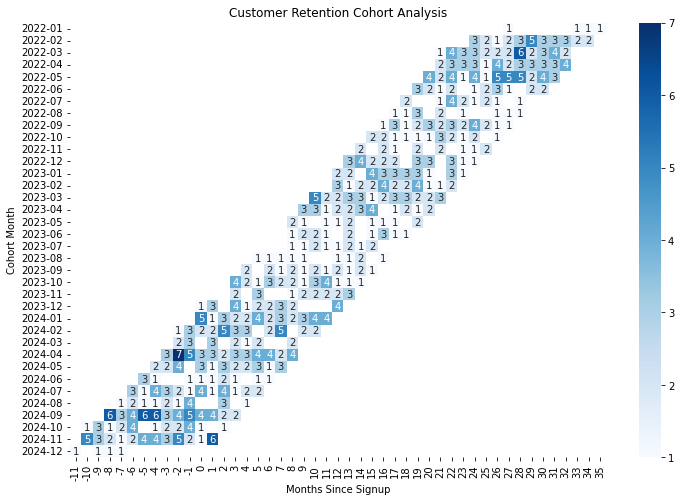

In [109]:
# Plot retention heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_pivot, annot=True, fmt=".0f", cmap='Blues')
plt.title('Customer Retention Cohort Analysis')
plt.xlabel('Months Since Signup')
plt.ylabel('Cohort Month')
plt.show()